In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
path = './instances/C203.txt'

In [3]:
solution = """0 0.0 47 18.027756377319946 50 113.02775637731995 51 205.26382435481975 52 300.26382435481975 20 406.07521265566163 22 498.90363978040784 24 592.5091910558718 27 685.337618180618 30 779.5802588677374 29 874.5802588677374 6 973.5245307777366 34 1072.068534523054 36 1253 33 1348.8309518948454 32 1440.8309518948454 31 1535.8309518948454 35 1630.8309518948454 37 1726.6619037896908 38 1818.6619037896908 39 1913.6619037896908 28 2014.4322334039598 26 2112.4944911522584 23 2209.7055937031864 17 2311 13 2405 18 2502.0 19 2597.0 15 2692.0 16 2787.0 14 2879.0 12 2972.0 9 3077.2970585407784 11 3174.3681263526437 10 3267.3681263526437 0 3374.1311809668837
0 0.0 21 11.661903789690601 25 2504 8 2887 0 2988.6619037896908
0 0.0 93 8.246211251235321 5 105.24621125123532 75 198.2462112512353 2 293.2462112512353 1 391.8485365182779 99 487.67948841312324 100 582.6794884131232 97 677.6794884131232 92 774.6794884131232 94 868.2850396885872 95 961.8905909640512 98 1058.293715201484 7 1153.293715201484 3 1247.4168208271017 4 1341.0223721025657 88 1546 86 1641.0990195135928 84 1736.0990195135928 82 1831.9299714084382 85 1936.14264181199 76 2131 71 2226.0 70 2321 73 2414.0 80 2513 79 2608.3851648071345 81 2703.770329614269 78 2802.3726548813115 77 2900.182904557218 83 3000.182904557218 87 3102.2244991360103 96 3198.549054456347 0 3312.7151464035364
0 0.0 89 21.2602916254693 91 116.91714587496169 90 211.9171458749617 63 319.9449022522816 67 412.9449022522816 69 680 66 772.0 62 865.0 74 958.0 72 1053.0 61 1146.0 64 1238.0 68 1334.0 46 1433.4339811320567 65 1533.4339811320567 49 1629.8371053694896 55 1727.6473550453961 54 1822.6473550453961 53 1918.0325198525306 56 2012.0325198525306 58 2104.0325198525306 60 2197.0325198525306 59 2292.863471747376 57 2387.863471747376 40 2481.46902302284 44 2575.941158977839 45 2676.139198005025 42 2769.7447492804886 41 2861.7447492804886 43 2955.3503005559523 48 3051.1812524507977 0 3151.9515820650668
""".split('\n')

In [4]:
def to_point(line):
    mapping = ['number', 'x', 'y', 'demand', 'ready_time', 'due_date', 'service_time']
    line = line.replace('\n', '').split()
    return {k:int(v) for k,v in zip(mapping, line)}

In [5]:
with open(path, 'r') as f:
    data = f.readlines()
points = list(map(to_point, data[9:]))

In [6]:
G = nx.Graph()
G.add_nodes_from(range(len(points)))
for route in solution:
    G.add_path(list(map(int, route.split()[::2])))

In [7]:
paths = []
for route in solution:
    path = []
    route = list(map(int, route.split()[::2]))
    for i in range(len(route) - 1):
        path.append((route[i], route[i+1]))
    paths.append(path)

c:\users\gzhigalov\documents\programs\miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


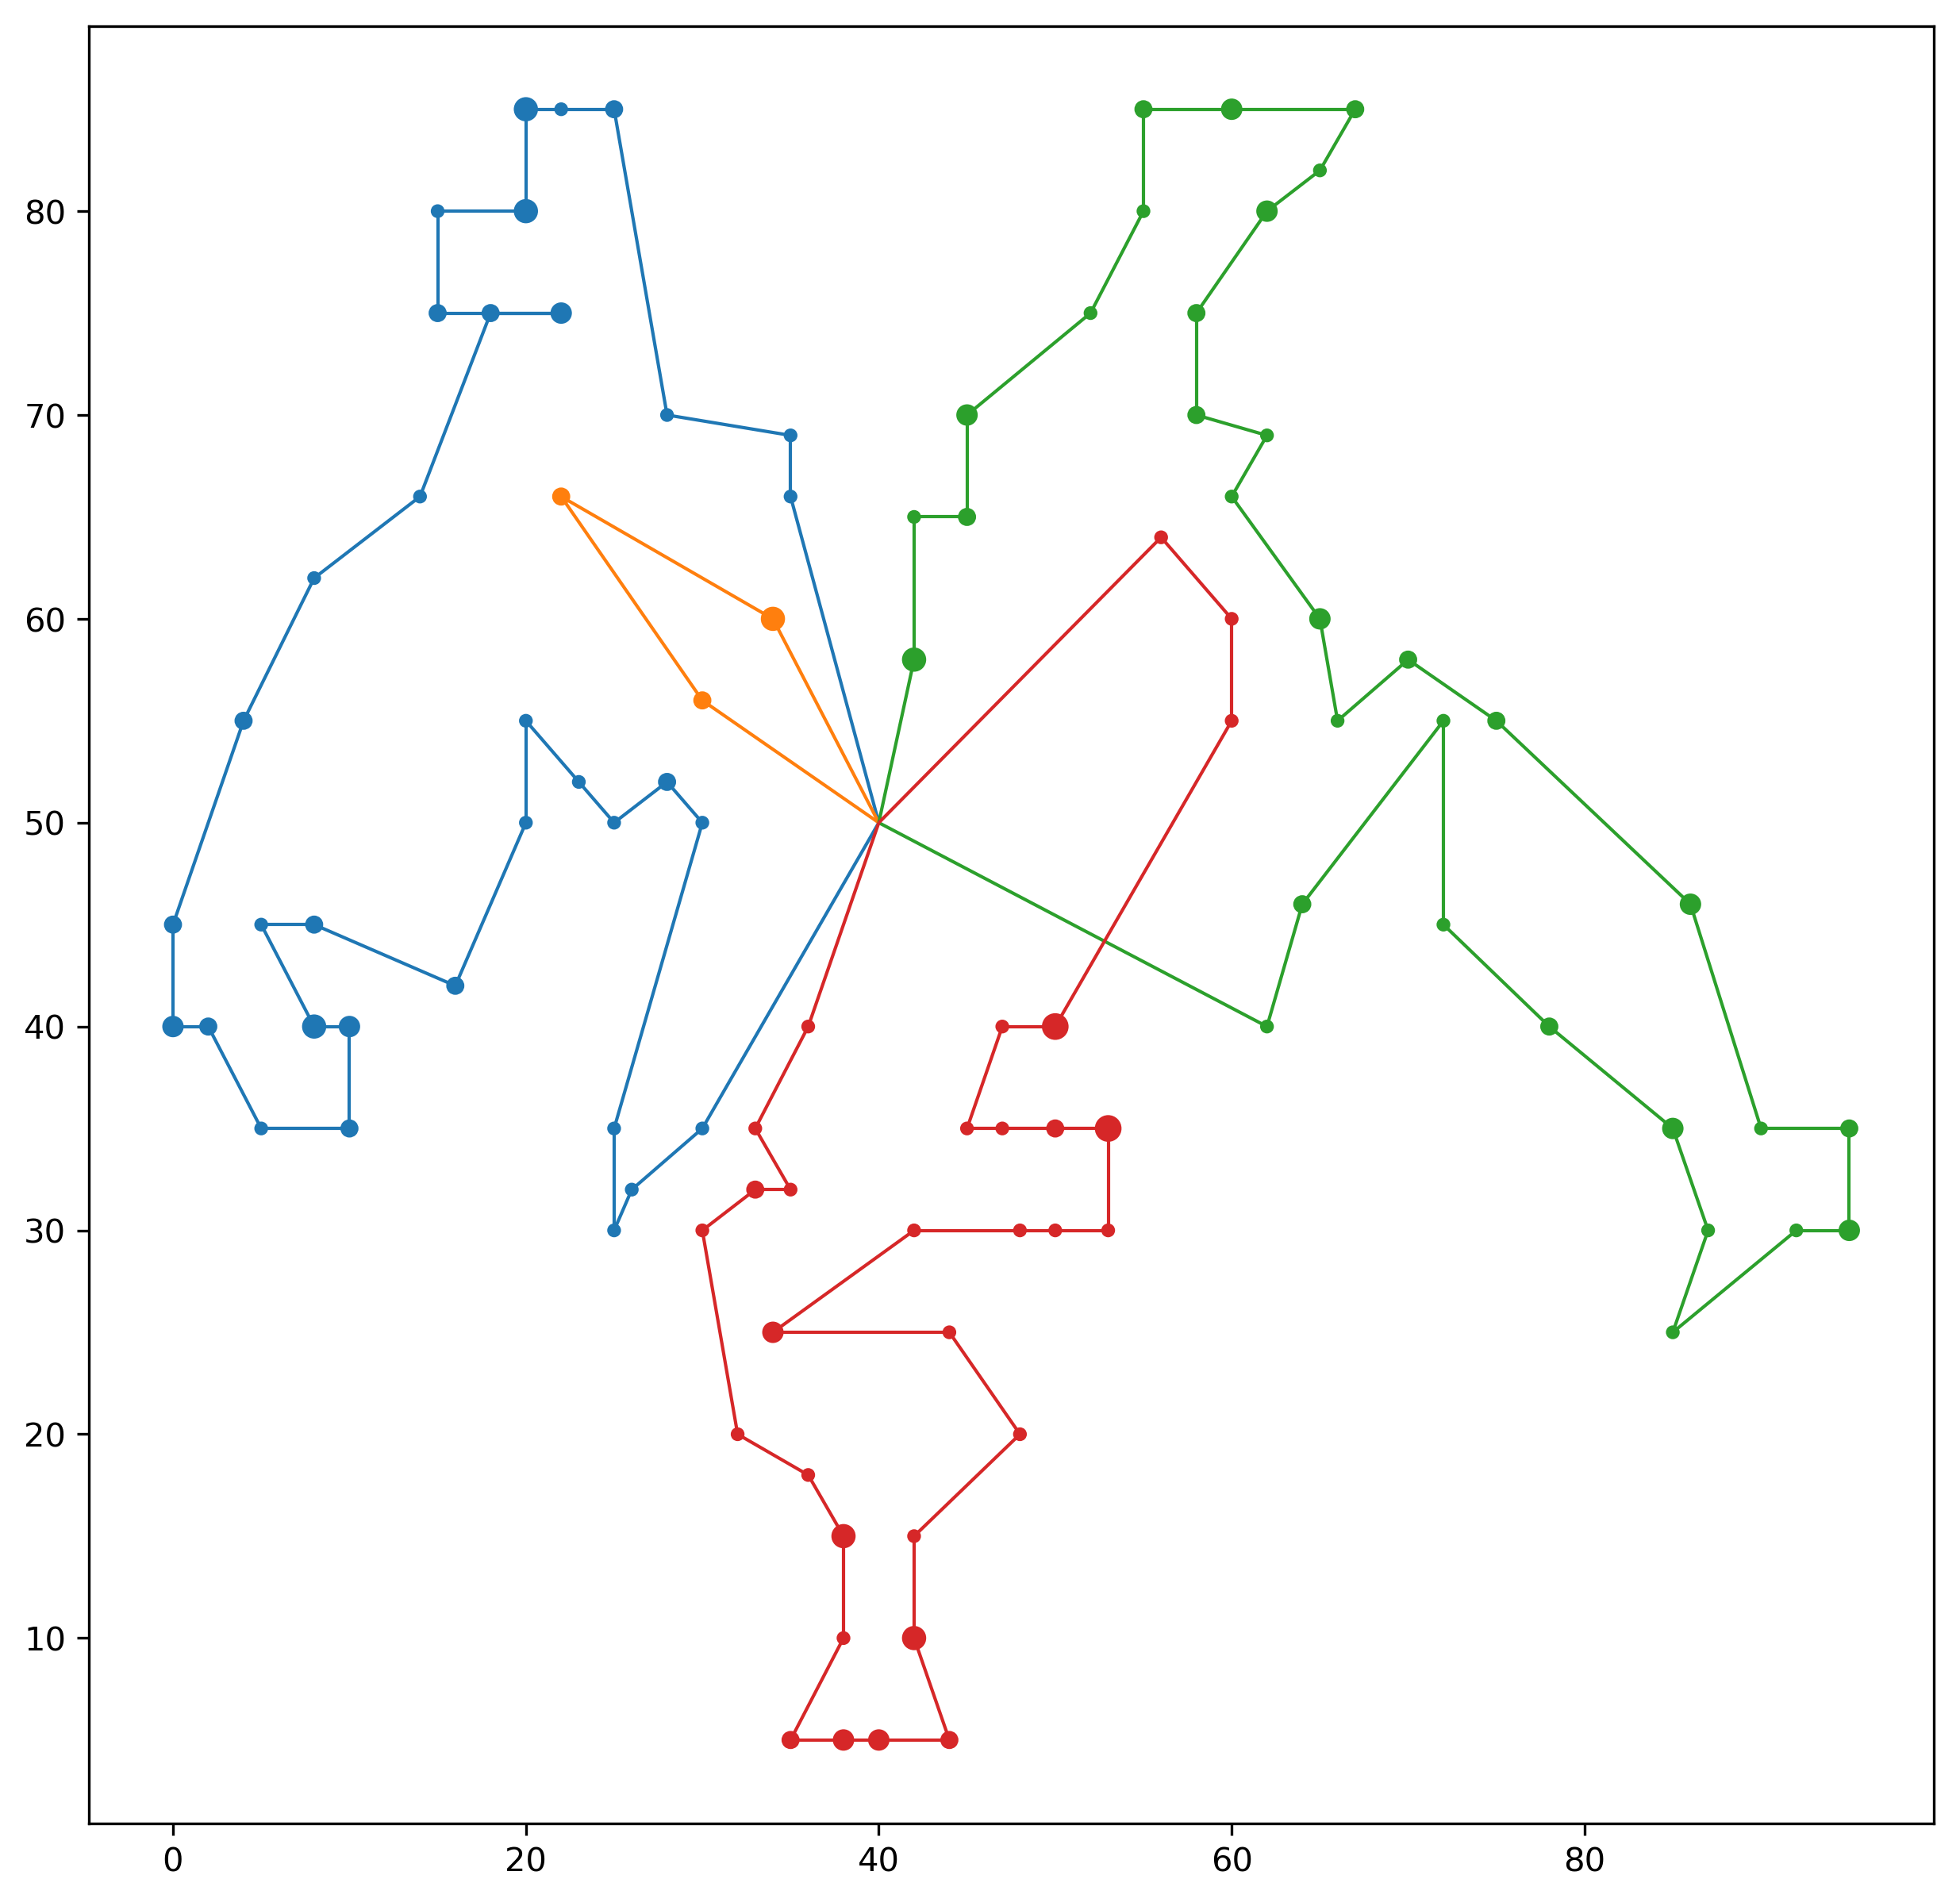

In [8]:
from itertools import cycle
col = cycle(colors.TABLEAU_COLORS)
# pos = nx.spring_layout(G)
pos = {point['number']: (point['x'], point['y']) for point in points}

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
# ax.grid()

# nx.draw_networkx_labels(G, pos=pos, labels=labels, ax=ax)
for path in paths:
    # print(path)
    path_color = next(col)
    nodes_in_path = {x for p in path for x in p}
    node_sizes = [point['demand'] for point in points if point['number'] in nodes_in_path]
    
    labels = {filter(lambda x: x['number'] in nodes_in_path, points)}
    nx.draw_networkx_edges(G, pos=pos, edgelist=path, ax=ax, edge_color=path_color)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_in_path, node_size=node_sizes, node_color=path_color, ax=ax)
plt.savefig("solution1.png", dpi=300)